## Cats and Dogs Classifier using Logistic Regression

#### we'll be building a Dog and Cat classifier
#### using Logistic Regression from scikit-learn library.

### Our main goals are:

#### 1. gathering data.
#### 2. pre-process the data for training purpose.
#### 3. label the images as `cat` or `dog` for training purpose.
#### 4. create training and testing sets.

#### we'll use our pre-processed data to train our logistic regression model.

#### In addition, we'll use the  scikit-learn library which already contains wrappers for many ML algorithms.

In [1]:
# importing useful libraries (packages)

import requests # for downloading the compressed (zipped) dataset.
import zipfile # for extracting the dataset.
import os # for getting path and file names from system.
from PIL import Image # for applying image transformations on images.
import matplotlib.pyplot as plt # for displaying images and graphs.
import numpy as np # for array manipulations.
from sklearn.linear_model import LogisticRegression # library containing wrappers for ML algorithms.
from sklearn.metrics import confusion_matrix # for later displaying a confusion matrix, which measures our model's prediction accuracy.
import seaborn as sns # for plotting heatmaps.

np.random.seed(42)

#### Assistant functions
##### These will help downloading, extracting and cropping.

In [2]:
# Downloads the compressed version of the dataset
# directly from this notebook.

def download(url, file_name):
  """
  Downloads the dataset for project
  input:
    url (string): url for dataset
    file_name (string): file name in which downloaded dataset will be stored
  """
  response = requests.get(url, stream=True)
  if response.status_code == 200:
      with open(file_name, 'wb') as f:
          f.write(response.raw.read())

In [3]:
# Will extract the zipped file.

def extract_zip(s_path, d_path):
  """
  Extract (unzip) the compressed dataset for working
  input:
    s_path (string): path of zipped dataset
    d_path (string): path to store the unzipped dataset
  """
  with zipfile.ZipFile(s_path, 'r') as zip_ref:
      zip_ref.extractall(d_path)

In [4]:
# Will crop any image from center based on given size.

def center_crop(image_path, size):
  """
  crop the image from center of the given size
  input:
    image_path (string): Path of image
    size (int): size to which the image being cropped from center
  """
  img = Image.open(image_path)
  img = img.resize((size+1,size+1))
  x_center = img.width/2
  y_center = img.height/2
  size = size/2
  cr = img.crop((x_center-size, y_center-size, x_center+size, y_center+size))

  return cr

#### Downloading and extracting the dataset.

In [6]:
download("https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip", "images.zip")

In [1]:
extract_zip("images.zip", "images")

#### Displaying an image just for verification of dataset.

In [5]:
# 'Image.open()': takes the path of image and gives a
# 'JpegImageFile' object, through which we can plot it.

img = Image.open("./images/Cat_Dog_data/train/cat/cat.0.jpg")
img.format, type(img)

('JPEG', PIL.JpegImagePlugin.JpegImageFile)

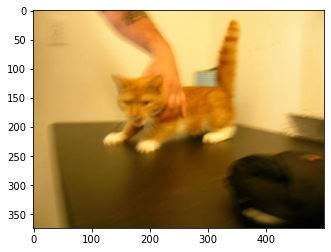

In [6]:
# takes the 'JpegImageFile' object, and plot the
# image as a graph.
plt.imshow(img)

### Grabbing all the names of cat and dog images.

##### We'll now take all the names of the cat and dog images,
##### and save them into two separate lists.

In [7]:
# 'os.listdir()' takes the path of a folder and returns
# a list containing the names of lists and directories 
# inside the folder.

# In this case we're taking the names of all the images
# inside the 'cats and dogs' training folder: 'Cat_Dog_data/train'

cat_list = os.listdir("./images/Cat_Dog_data/train/cat")
dog_list = os.listdir("./images/Cat_Dog_data/train/dog")


In [8]:
len(cat_list), len(dog_list)

(11250, 11250)

In [9]:
# We're only taking 5000 images from each category
# in order to reduce the computation time.

# Note that we're using logistic regression, which means
# that taking too much data may compromise the model's
# testing results.

cat_list = cat_list[:5000]
dog_list = dog_list[:5000]

In [10]:
len(cat_list), len(dog_list)

(5000, 5000)

In [11]:
# creating a new list.
# this list will contain the names of both cats and dogs,
# so that we can shuffle them.
# That's instead of keeping cat images on top and 
# dog images in bottom.

train_list = []
# '.extend()' - append itmes of an entire list to the end of another list.
train_list.extend(cat_list) 
train_list.extend(dog_list)

In [12]:
# np.random.shuffle() takes the list/array and randomly shuffle it's elements.
np.random.shuffle(train_list)

In [13]:
## shuffled version of `train_list`
train_list[:10]

['dog.11248.jpg',
 'cat.3435.jpg',
 'cat.11727.jpg',
 'cat.3492.jpg',
 'cat.3268.jpg',
 'dog.11335.jpg',
 'cat.10581.jpg',
 'dog.10207.jpg',
 'dog.11358.jpg',
 'cat.10440.jpg']

### Preparing Training Data

##### Logistic Regression, as we know, can only work with numbers,
##### and not with any '.jpg' files.

##### Thus, we'll use 'train_list' (which contains the names of all training images), and convert it's items into NumPy arrays.

##### W'll store these arrays in the 'train_data' variable.

##### We currently have 5,000 images of cats, and 5,000 images of dogs. Giving us a total of 10,000 images.
##### Note that these images have different shapes and sizes (height\width). This means we must crop them into a fixed-size of our choosing, so that the model could learn from them.

##### We're going to crop each image into 100x100 size.
##### Since these are RGB images, the final shape of each image will be 100x100x3

In [14]:
# Creating a NumPy array with 10,000 rows (one for each image),
# and 100*100*3 columns

train_data = np.zeros((10000,100*100*3))

In [15]:
# iterating through 'train_list'.
# Cropping each image from center in 100x100 size,
# then converting PIL object into numpy array and storing it into train_data.

for i, image_name in enumerate(train_list):
  if image_name.split(".")[0] == "dog":
    path =  "./images/Cat_Dog_data/train/dog"
  else:
    path =  "./images/Cat_Dog_data/train/cat"
  image_path = f'{path}/{image_name}'
  crp_img = center_crop(image_path,100)
  crp_arr = np.array(crp_img).reshape(-1) # flattening the image using '.reshape(-1)', so that we can store it into 'train_data'.
  train_data[i] = crp_arr

##### To conclude, all the 100x100x3 values will act as features. The number of images is the total number of samples in the dataset.

In [16]:
# Checking. We indeed have NumPy arrays.
train_data[0]

array([191., 200., 199., ..., 198., 210., 206.])

In [17]:
# Scaling array values between 0 and 1 so that our algorithm can converge nicely.
train_data = train_data/255

In [18]:
# Checking. Values are now in range interval (0,1)
train_data[0]

array([0.74901961, 0.78431373, 0.78039216, ..., 0.77647059, 0.82352941,
       0.80784314])

### Preparing label data

#### Our training data is now ready.
#### Now we must provide labels for our training set (so that our algorithm be able to distinguish between cats and dogs).
#### We'll be denoting: 'cat' as 0, 'dog' as 1.

##### We'll loop through 'train_list' and check whether the name of the image contains the word 'cat'. If it doesn't, then it must contain the word 'dog'. This way we could label each image accordingly.

In [19]:
print("printing the name of some image")
print("-> ",train_list[0])
print("Splitting the image from all . characters into a list")
print("-> ",train_list[0].split("."))
print("selecting the 0th element of splitted list")
print("-> ",train_list[0].split(".")[0])

printing the name of some image
->  dog.11248.jpg
Splitting the image from all . characters into a list
->  ['dog', '11248', 'jpg']
selecting the 0th element of splitted list
->  dog


##### We'll use the technique showcased above, to check whether the name contains the word cat or dog, and label that sample as 0 and 1 respectively.

In [20]:
# cat: 0
# dog: 1
train_labels = np.array([0 if name.split(".")[0]=="cat" else 1 for name in train_list])

In [21]:
train_labels.shape

(10000,)

### Training Logistic Regression Model

##### We'll now create an instance of the Logistic Regression model. As we know, the 'LogisticRegression' class lies within 'sklearn.linear_model'. 
##### In addition, when creating an instance of the model we could pass different hyperparameters which may affect the model's final accurecy score.
##### For example, perhaps passing a higher value for 'max_iter' may improve our model's testing results.

In [22]:
model = LogisticRegression(max_iter=100, n_jobs=-1)

In [23]:
# Using '.fit()' function to train the model. 
model.fit(train_data, train_labels)

LogisticRegression(n_jobs=-1)

In [24]:
model.score(train_data, train_labels)

0.756

### Predicting an image to see the result.

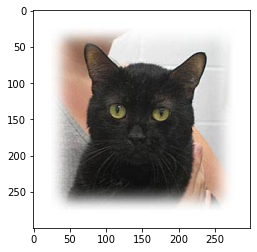

In [25]:
test_img = "./images/Cat_Dog_data/test/cat/cat.10038.jpg"
img = Image.open(test_img)
plt.imshow(img)

#### Note that before we're converting the sample image,
#### we must crop it to the same size used to train the images

In [26]:
im = center_crop(test_img,100) # cropping image
X = np.array(im).reshape(-1) # flattening the image to pass in model for prediction
X = X/255 # scale the pixels in 0-1 range

##### Using '.predict()' method on model, by passing it an array of the image we wish to predict. Note that 0 = cat, 1 = dog.

In [27]:
model.predict([X])

array([0])

### Analyzing results on training data using Confusion matrix

##### The confusion matrix will tell us how many samples are correctly classified, and how many are incorrectly classified.

In [28]:
train_pred = model.predict(train_data)
cm = confusion_matrix(train_pred, train_labels)
cm

array([[3844, 1284],
       [1156, 3716]], dtype=int64)

In [ ]:
# Note that:
# 0th row and 0th column :- number denotes the samples that are 0 and also predicted as 0
# 0th row and 1th column :- number denotes the samples that are 1 and also predicted as 0
# 1th row and 0th column :- number denotes the samples that are 0 and also predicted as 1
# 1th row and 1th column :- number denotes the samples that are 1 and also predicted as 1

<AxesSubplot:>

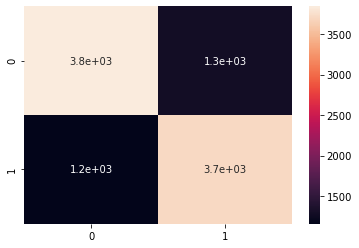

In [29]:
sns.heatmap(cm, annot=True)

#### Preparing test data to check performance on unsees samples

In [30]:
test_data_cat = os.listdir("./images/Cat_Dog_data/test/cat")
test_data_dog = os.listdir("./images/Cat_Dog_data/test/dog")

##### Just as before, we're taking a sample of cats and dogs, to reduce computation time.

In [31]:
test_data_cat = test_data_cat[:200]
test_data_dog = test_data_dog[:200]

In [32]:
test_list = []
test_list.extend(test_data_cat)
test_list.extend(test_data_dog)

In [33]:
len(test_list)

400

In [34]:
np.random.shuffle(test_list)

In [35]:
test_list[:10]

['cat.10662.jpg',
 'cat.11173.jpg',
 'cat.1025.jpg',
 'cat.10609.jpg',
 'cat.10721.jpg',
 'cat.11725.jpg',
 'cat.10068.jpg',
 'cat.11559.jpg',
 'cat.10115.jpg',
 'cat.10797.jpg']

In [36]:
test_data = np.zeros((400,100*100*3))

In [37]:
for i, image_name in enumerate(test_list):
  if image_name.split(".")[0] == "dog":
    path =  "./images/Cat_Dog_data/test/dog"
  else:
    path =  "./images/Cat_Dog_data/test/cat"
  image_path = f'{path}/{image_name}'
  crp_img = center_crop(image_path,100)
  crp_arr = np.array(crp_img).reshape(-1)
  test_data[i] = crp_arr

In [38]:
test_data = test_data/255

In [39]:
test_labels = np.array([0 if name.split(".")[0]=="cat" else 1 for name in test_list])

### Analyzing results on test data using Confusion Matrix

[[107  79]
 [ 93 121]]


<AxesSubplot:>

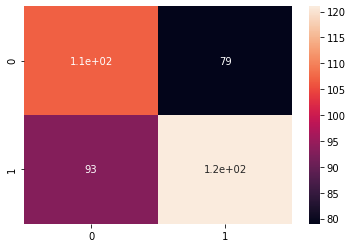

In [40]:
pred = model.predict(test_data)
cm = confusion_matrix(pred, test_labels)
print(cm)
sns.heatmap(cm, annot=True)

In [41]:
test_acc = model.score(test_data, test_labels)
print("Accuracy on test set: ", test_acc)

Accuracy on test set:  0.57


### Predicting own custom image

#### We'll now pass our own custom image of either a dog or a cat, and let the model predict what animal is it.

##### To do so, we'll create two functions to assist us:

##### 'show_image()' - Takes the path of image as input and displays the image.

##### 'predict_custom_image()' - Takes the model and the image path, and returns the predicted value: 0 for cat, 1 for dog.

In [42]:
def show_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)

In [43]:
def predict_custom_image(model, img_path):
    crp_img = center_crop(img_path,100)
    crp_arr = np.array(crp_img).reshape(1,-1)
    pred = model.predict(crp_arr)
    if pred == 0:
        return "Cat"
    return "Dog"

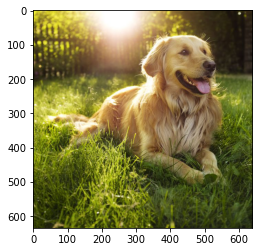

In [44]:
test_img_path = "test.jpg" # provide path to your custom image (make sure it's either jpg or jpeg)
show_image(test_img_path)

In [45]:
predict_custom_image(model, test_img_path)

'Dog'